## Prácticas Naive Bayes y KNN (ejercicio 5)

#### 1. Tomando como base este [tutorial](https://colab.research.google.com/drive/1zFIOfrceEaFkhQOEOkMWroBmNV1HAMVS?usp=drive_link),  crea un modelo de clasificación usando KNN con los mismos datos sintéticos. Para la elección de los mejores hiperparámetros usa un sistema de [validación cruzada](https://educacionadistancia.juntadeandalucia.es/centros/cordoba/pluginfile.php/406946/mod_resource/content/1/M2_SAA_S10%20-%20Validaci%C3%B3n.pdf).

#### 2. Usando los datos almacenados en data2.csv, crea un modelo de clasificación usando los modelos de NaiveBayes mostrados en el [vídeo 5](https://vimeo.com/600140324). Indicad qué modelo da mejores resultados. Os toca investigar cómo cargar un archivo csv desde Google Collab.

#### 3. En este [enlace](https://www.kaggle.com/datasets/uciml/red-wine-quality-cortez-et-al-2009) puedes descargar un dataset que recoge diferentes características de vino rojo portugués "Vinho Verde" y la calidad del mismo. Crea un modelo de clasificación usando NaiveBayes (GaussianNB) y KNN.

#### 4. Plantea el problema anterior con un modelo de regresión usando KNN. En el [vídeo 7](https://vimeo.com/600141357) hay un ejemplo de regresión con KNN.

#### **5. Usando los datos almacenados en data5.csv, crea un modelo de clasificación usando NaiveBayes y KNN. Haz un estudio inicial de las correlaciones entre las variables.**

#### author: Virginia Ordoño Bernier - date: december 2023


### 1. Carga de datos

In [14]:
import pandas as pd
import numpy as np

df_data = pd.read_csv("data/data5.csv")
df_data.head()

,feature_1,feature_2,feature_3,feature_4,feature_5,target
0,-2.250270,-1.646135,1.436570,1.148096,-0.223791,2.0
1,-1.785269,-0.565972,1.346475,1.041822,-0.697704,2.0
2,1.589542,0.796631,-1.328454,-1.005298,1.753727,1.0
3,1.832943,-0.284234,-1.907732,-1.272604,-0.718502,0.0
4,1.012438,0.080761,-0.998305,-0.524684,-1.071300,0.0


### 2. Comprobación tipo de datos y nulos

In [15]:
df_data.dtypes

feature_1    float64
feature_2    float64
feature_3    float64
feature_4    float64
feature_5    float64
target       float64
dtype: object

In [16]:
total_nulls = df_data.isnull().sum()
total_nulls

feature_1    0
feature_2    0
feature_3    0
feature_4    0
feature_5    0
target       0
dtype: int64

### 3. Correlación entre variables

,feature_1,feature_2,feature_3,feature_4,feature_5,target
feature_1,1.000000,0.492777,-0.933126,-0.912964,-0.037674,-0.643008
feature_2,0.492777,1.000000,-0.149996,-0.152247,-0.028589,-0.043386
feature_3,-0.933126,-0.149996,1.000000,0.975758,0.028494,0.704496
feature_4,-0.912964,-0.152247,0.975758,1.000000,0.029646,0.682975
feature_5,-0.037674,-0.028589,0.028494,0.029646,1.000000,0.030719
target,-0.643008,-0.043386,0.704496,0.682975,0.030719,1.000000


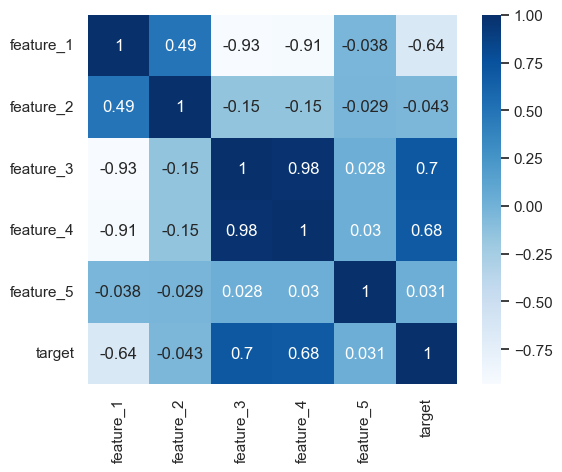

In [17]:
import seaborn as sns

sns.set()
sns.heatmap(df_data.corr(), square=True, annot=True, cmap='Blues')

df_data.corr()

# Lectura
# Correlaciones débilmente positivas: f5 y target 
# Correlaciones fuertemente negativas: f1-f3, f1-f4 

### 4. Clasificación con NB

In [20]:
# Seleccionar características (X) y etiquetas (y)
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB


# Seleccionar características (X) y etiquetas (y)
X = df_data.drop(['feature_2', 'feature_3', 'feature_4'], axis=1)
y = df_data['target']

# Dividir el conjunto de datos en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=42)

# Crear y entrenar el clasificador Gaussian Naive Bayes
model_gnb = GaussianNB()
model_gnb.fit(X_train, y_train)

# Realizar predicciones en el conjunto de prueba
y_pred = model_gnb.predict(X_test)

# Evaluar el rendimiento del modelo
accuracy = accuracy_score(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

# Imprimir resultados
print(f'Precisión: {accuracy:.2f}')
print('Classification Report:')
print(classification_rep)

Accuracy: 1.00
Classification Report:
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00       136
         1.0       1.00      1.00      1.00       127
         2.0       1.00      1.00      1.00       137

    accuracy                           1.00       400
   macro avg       1.00      1.00      1.00       400
weighted avg       1.00      1.00      1.00       400



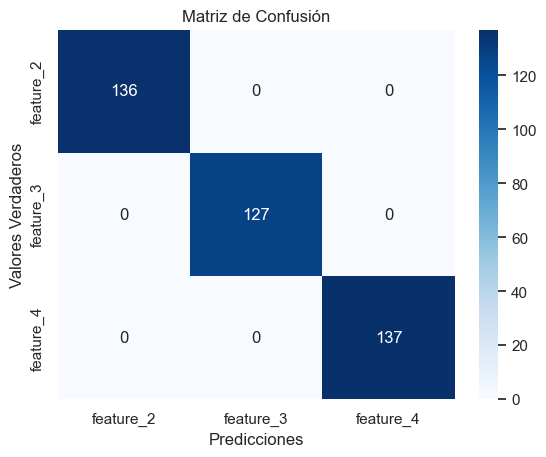

In [25]:
from matplotlib import pyplot as plt

# Matriz de confusión
cm = confusion_matrix(y_test, y_pred)
classes = ('feature_2', 'feature_3', 'feature_4')
sns.heatmap(cm, annot=True, cmap='Blues', xticklabels=classes, yticklabels=classes, fmt='d')
plt.title('Matriz de Confusión')
plt.xlabel('Predicciones')
plt.ylabel('Valores Verdaderos')
plt.show()

### 5. Clasificación con KNN